#  Project -  Python Script for Data Preparation

In [1]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

## Step 1: Read the dirtydata4bestdeal CSV and load into a dataframe object

In [2]:
dirtydata4bestdeal=pd.read_csv(r'/Users/Zeeshan/Desktop/PREDICT 420/Final/Project/DirtyData4BestDeal10000.csv')

In [3]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


## Step 2: Clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [4]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


## Step 3: Save the cleaned data into the Database

In [5]:
# Add the rest of your code here to clean the data


cleandata1 = cleandata4bestdeal.apply(pd.to_numeric, errors='coerce')

cleandata2 = cleandata1.loc[:,'SamsungTV46LED':'TVStandWallMount']

cleandata3 = cleandata2[cleandata2<=1]

cleandata4 = cleandata3.dropna()

cleandata5 = cleandata1.loc[cleandata4.index]

cleandata6 = cleandata5[(cleandata5.CustomerAge >= 18) & (cleandata5.CustomerAge <= 150)]

cleandata6

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
9,2109.0,37.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0
10,2109.0,57.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
13,62791.0,27.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1
16,60616.0,43.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
17,2110.0,28.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1
18,60616.0,54.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1


In [6]:
engine=create_engine('sqlite:///bestdeal.db')

In [7]:
cleandata6.to_sql('trans4cust', engine)

ValueError: Table 'trans4cust' already exists.

In [ ]:
insp=inspect(engine)

In [ ]:
 insp.get_table_names()

In [ ]:
pd.read_sql_table('trans4cust', engine).columns

## Step 4: Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [ ]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [ ]:
resultsForBestDealCustTrans.head()

#### Query example #2: get the transactions for ALL customers

In [ ]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [ ]:
resultsForBestDealCustTrans.head()

#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [ ]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [ ]:
resultsForBestDealCustTrans

#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [ ]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [ ]:
resultsForBestDealCustTrans

#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [ ]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [ ]:
SonyTV60LEDCustTrans

In [ ]:
BoseSoundSystemCustTrans

In [ ]:
SonyTV60LEDCustTrans.ZipCode


In [ ]:

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose

import numpy

sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip=bose_dict.keys()
bose_zip.sort()

sony_zip=sony_dict.keys()
sony_zip.sort()

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


In [ ]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

### Deliverable #1 (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge

In [8]:
DellHPBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE DellLaptop=1 AND HPPrinter = 1 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)
DellHPBestDealCustTrans

,CustomerAge,num_customers
0,21.0,201
1,22.0,203
2,23.0,304
3,25.0,64
4,26.0,183
5,27.0,272
6,28.0,56
7,29.0,143
8,31.0,202
9,32.0,184


### Deliverable #2 (Use SQL/SQlite): get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)

In [16]:
xbox360BestDealCustTrans=pd.read_sql_query("SELECT ZipCode, Count(*) as 'CustDidNotBuy' FROM trans4cust WHERE XBOX360='0'", engine)
xbox360BestDealCustTrans

,ZipCode,CustDidNotBuy
0,33129.0,1732


### Deliverable #3 (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)

In [10]:
HPLaptopCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPLaptop=1 AND WDexternalHD=0  GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

HPPrinterCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPPrinter=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

In [11]:
HPLaptopCustTrans

,CustomerAge,num_customers
0,21.0,192
1,22.0,203
2,23.0,437
3,25.0,147
4,26.0,205
5,27.0,307
6,28.0,128
7,29.0,290
8,31.0,204
9,32.0,176


In [12]:
HPPrinterCustTrans

,CustomerAge,num_customers
0,21.0,192
1,22.0,193
2,23.0,437
3,25.0,147
4,26.0,205
5,27.0,288
6,28.0,128
7,29.0,290
8,31.0,204
9,32.0,176


In [13]:
import numpy

HPLaptopAgeTuples=tuple(HPLaptopCustTrans.CustomerAge.astype(numpy.int))
HPLaptop_num_customersTuples=tuple(HPLaptopCustTrans.num_customers.astype(numpy.int))

HPPrinterAgeTuples=tuple(HPPrinterCustTrans.CustomerAge.astype(numpy.int))
HPPrinter_num_customersTuples=tuple(HPPrinterCustTrans.num_customers.astype(numpy.int))




HPLaptop_dict = dict(zip(HPLaptopAgeTuples, HPLaptop_num_customersTuples))
HPPrinter_dict = dict(zip(HPPrinterAgeTuples, HPPrinter_num_customersTuples))

for key in HPPrinter_dict.keys():
    if ((key in HPLaptop_dict.keys()) == False): HPLaptop_dict[key]=0

        
for key in HPLaptop_dict.keys():
    if ((key in HPPrinter_dict.keys()) == False): HPPrinter_dict[key]=0


        
HPPrinter_age=HPPrinter_dict.keys()
HPPrinter_age.sort()

HPLaptop_age=HPLaptop_dict.keys()
HPLaptop_age.sort()

HPPrinter_age_tuple=tuple(HPPrinter_age)

HPLaptop_age_tuple=tuple(HPLaptop_age)

HPPrinter_customer_list=[]

for printer in HPLaptop_age_tuple:
    HPPrinter_customer_list.append(HPPrinter_dict[printer])

HPLaptop_customer_list=[]

for laptop in HPLaptop_age_tuple:
    HPLaptop_customer_list.append(HPLaptop_dict[laptop])

HPPrinter_customer_tuple=tuple(HPPrinter_customer_list)
HPLaptop_customer_tuple=tuple(HPLaptop_customer_list)

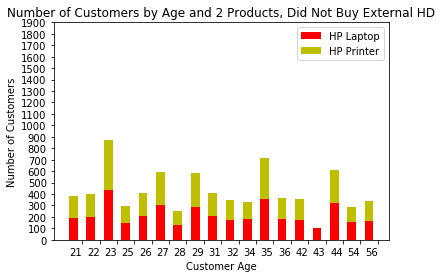

In [14]:
import numpy as np
import matplotlib.pyplot as plt


ind = np.arange(len(HPLaptop_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, HPLaptop_customer_tuple, width,  color='r')
p2 = plt.bar(ind, HPPrinter_customer_tuple, width, color='y', bottom=HPLaptop_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')

plt.title('Number of Customers by Age and 2 Products, Did Not Buy External HD')

plt.xticks(ind + width, HPLaptop_age_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('HP Laptop', 'HP Printer'))

plt.show()